# Finetuning results
This notebook presents a comparison between finetuning results from runs on different formats of data and prompts.

In [10]:
import wandb
import matplotlib.pyplot as plt

If you want to run this code by yourself, you need to provide the valid wandb api key, and you need to have the experiments recorded in wandb.

In [11]:
wandb.login(key='')
api = wandb.Api()

project_name = "CompareDataForLLamas"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/gustaw/.netrc


Example of how the runs are stored in wandb:

In [12]:
runs = api.runs(f"{wandb.Api().default_entity}/{project_name}")
history = runs[0].history()
history.head()

,_runtime,_timestamp,train/loss,train/epoch,train/grad_norm,train/global_step,train/learning_rate,_step
0,20.599374,1.738608e+09,3.0202,1,3.151361,1,0.003,0
1,23.637720,1.738608e+09,3.0202,2,3.150890,2,0.006,1
2,24.122156,1.738608e+09,3.4033,3,47.413074,3,0.009,2
3,24.609232,1.738608e+09,8.2087,4,143.590881,4,0.012,3
4,25.076885,1.738608e+09,14.3528,5,83.274704,5,0.015,4


# Results
Below are the plots representing data stored in wandb for every run.
I draw no conclusions from it, as I think this should be discussed with the team.

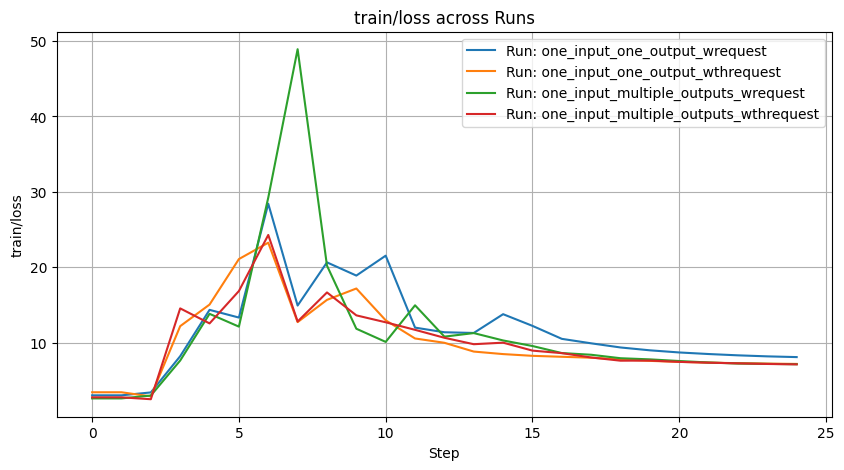

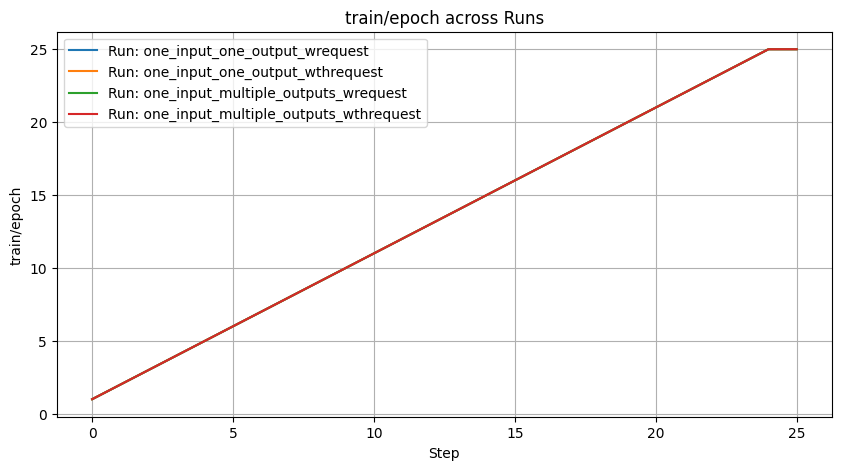

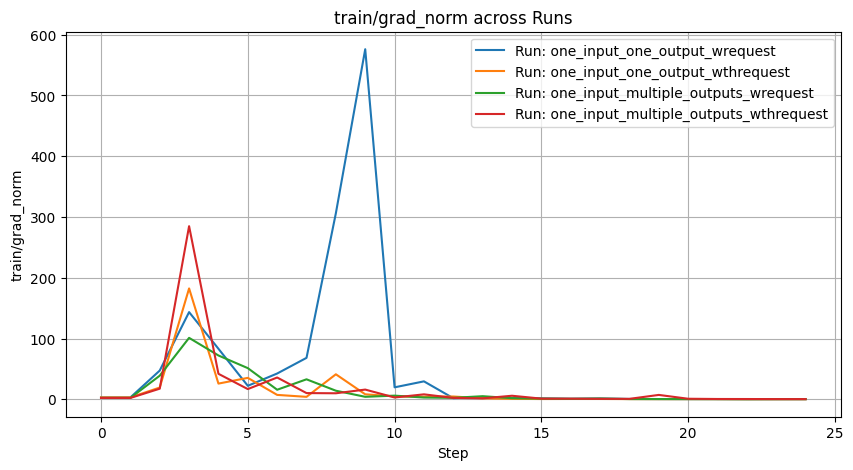

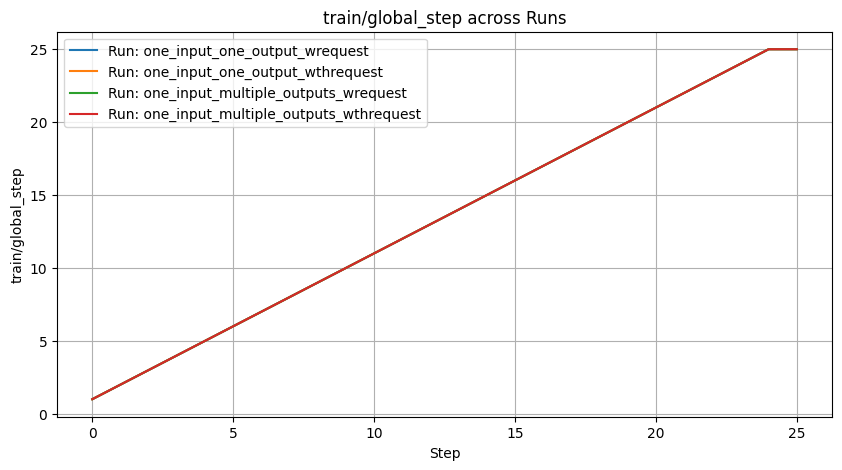

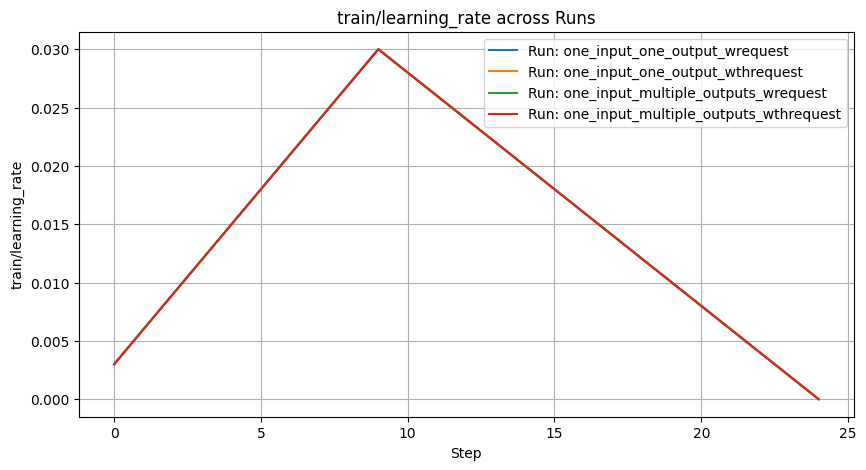

In [13]:
def plot_runs_data(runs, metric):
    plt.figure(figsize=(10, 5))
    for run in runs:
        history = run.history()
        plt.plot(history["_step"], history[metric], label=f"Run: {run.name}")

    plt.xlabel("Step")
    plt.ylabel(metric)
    plt.title(f"{metric} across Runs")
    plt.legend()
    plt.grid()
    plt.show()

plot_runs_data(runs, "train/loss")
plot_runs_data(runs, "train/epoch")
plot_runs_data(runs, "train/grad_norm")
plot_runs_data(runs, "train/global_step")
plot_runs_data(runs, "train/learning_rate")